In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz

In [2]:
#이전에 크롤링했던 파일을 불러옴
movie = pd.read_csv("Movie.csv", names = None) 
#Action Adventure Animation Biography Comedy Crime Documentary Drama Family 
#Fantasy Flim-Noir History Horror Music Musical Mystery News Reality-TV Romance Sci-Fi Short Sport ThrillerWar Western
#metacritc사이트에서 분류한 24가지의 영화장르를 구성
Genre_name = ['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy','Western','History','Music','Musical','Mystery','News',' Reality-TV','Romance','Sci-F','Short','Sport','Thriller','War','Film-Noir']
Genre =  movie['Genres']
#450개의 데이터에 24가지 장르값을 가지기위해 구성
Genre_arr = np.zeros((450,24))
#장르의 갯수를 알아보기 위해 배열 구성
Genre_num = np.zeros((24))
#450번의 for문을 돌리면서 해당 genre를 추출해서 만약에 genre가 존재한다면 1로표시
for i in range(0,450):
    for j in range(0,24):
            if Genre[i].find(Genre_name[j]) != -1:
                if j == 12 & Genre[i].find('Musical') != -1: # music을 탐색할때 musical이 있어도 music이 있는걸로 처리하기때문에 예외처리하는모습
                    if Genre[i].count('Music') == 1:
                        Genre_arr[i][j] = 0
                else :
                    Genre_arr[i][j] = 1
                    Genre_num[j] += 1
            

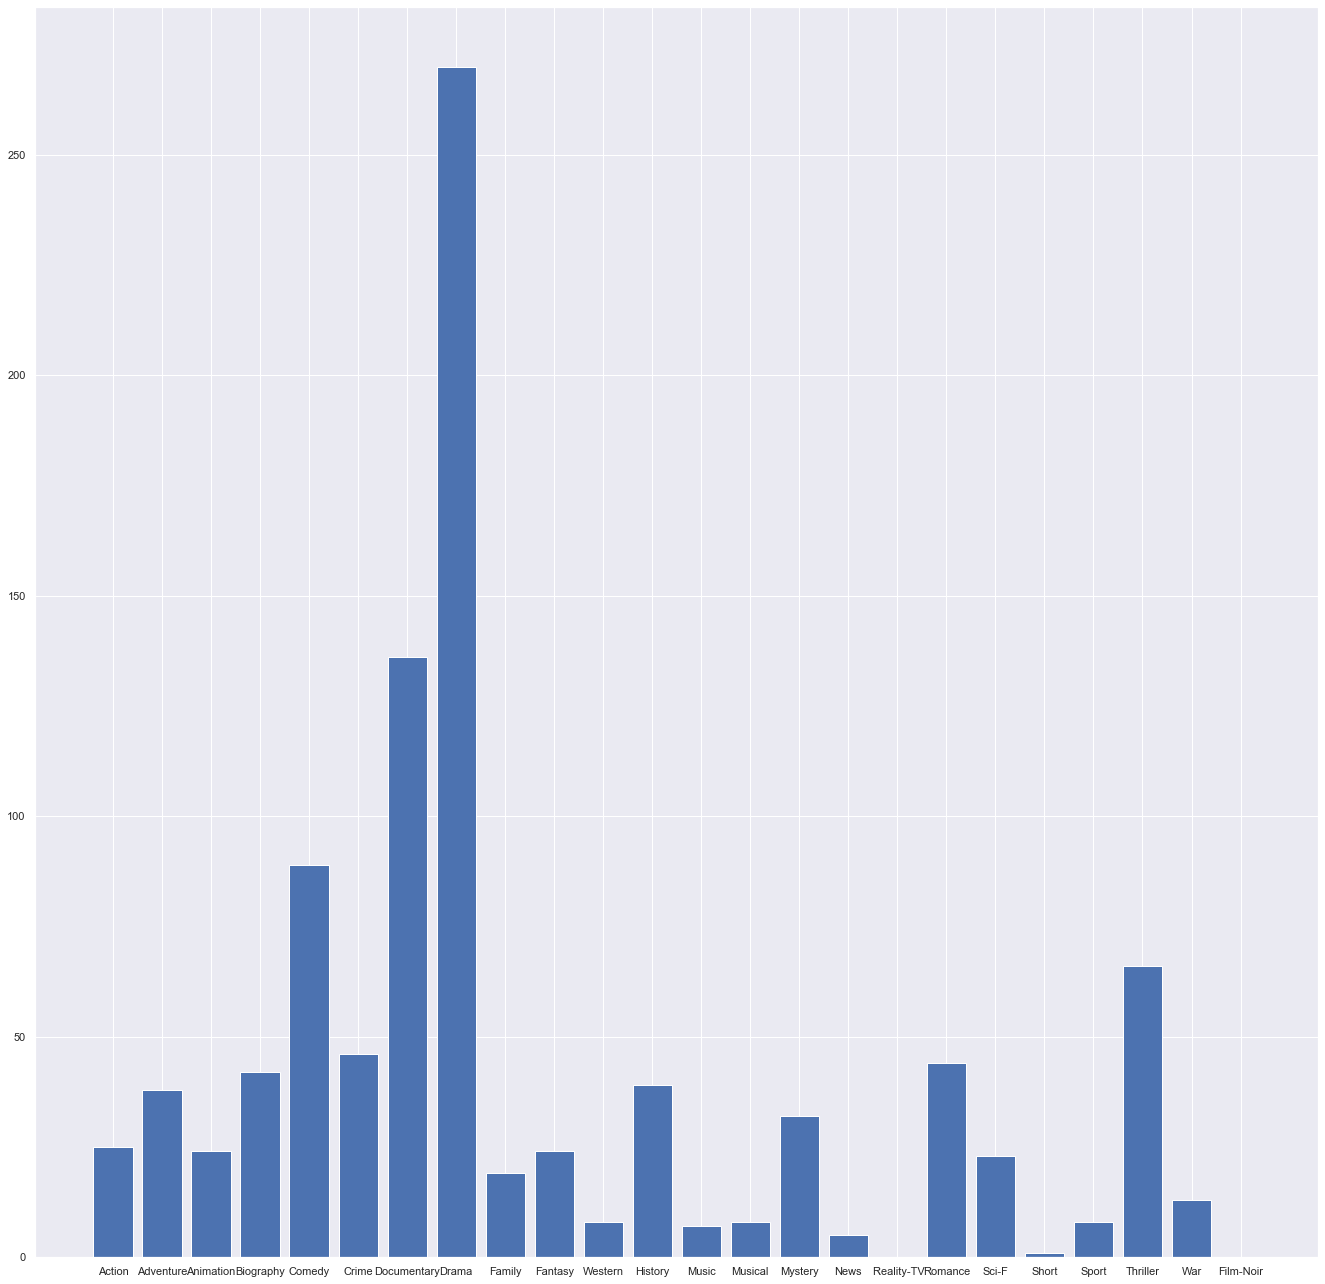

In [3]:
plt.figure(figsize=(23,23))
#영화 장르 분포도를 그래프로 구성
a = plt.bar(Genre_name,Genre_num)
plt.savefig('Num_Graph.png')
#Final_Result_df.to_csv('Craw_result.csv',index = False,encoding='utf-8',quoting=csv.QUOTE_NONNUMERIC)

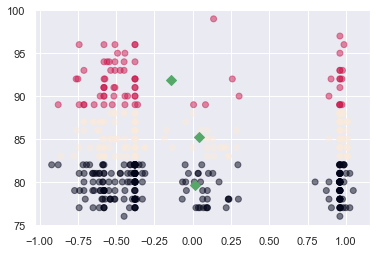

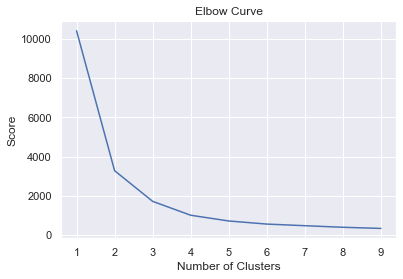

     Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0       0.0        0.0        0.0        0.0     1.0    0.0          0.0   
1       0.0        0.0        0.0        0.0     0.0    0.0          0.0   
2       0.0        0.0        0.0        1.0     0.0    1.0          0.0   
3       0.0        0.0        0.0        0.0     1.0    0.0          0.0   
4       0.0        0.0        0.0        0.0     0.0    0.0          0.0   
..      ...        ...        ...        ...     ...    ...          ...   
445     0.0        0.0        0.0        0.0     0.0    0.0          1.0   
446     0.0        0.0        0.0        0.0     0.0    0.0          0.0   
447     0.0        0.0        0.0        1.0     0.0    0.0          1.0   
448     0.0        0.0        0.0        0.0     1.0    0.0          0.0   
449     0.0        0.0        0.0        0.0     1.0    0.0          0.0   

     Drama  Family  Fantasy  ...  Mystery  News   Reality-TV  Romance  Sci-F  \
0      

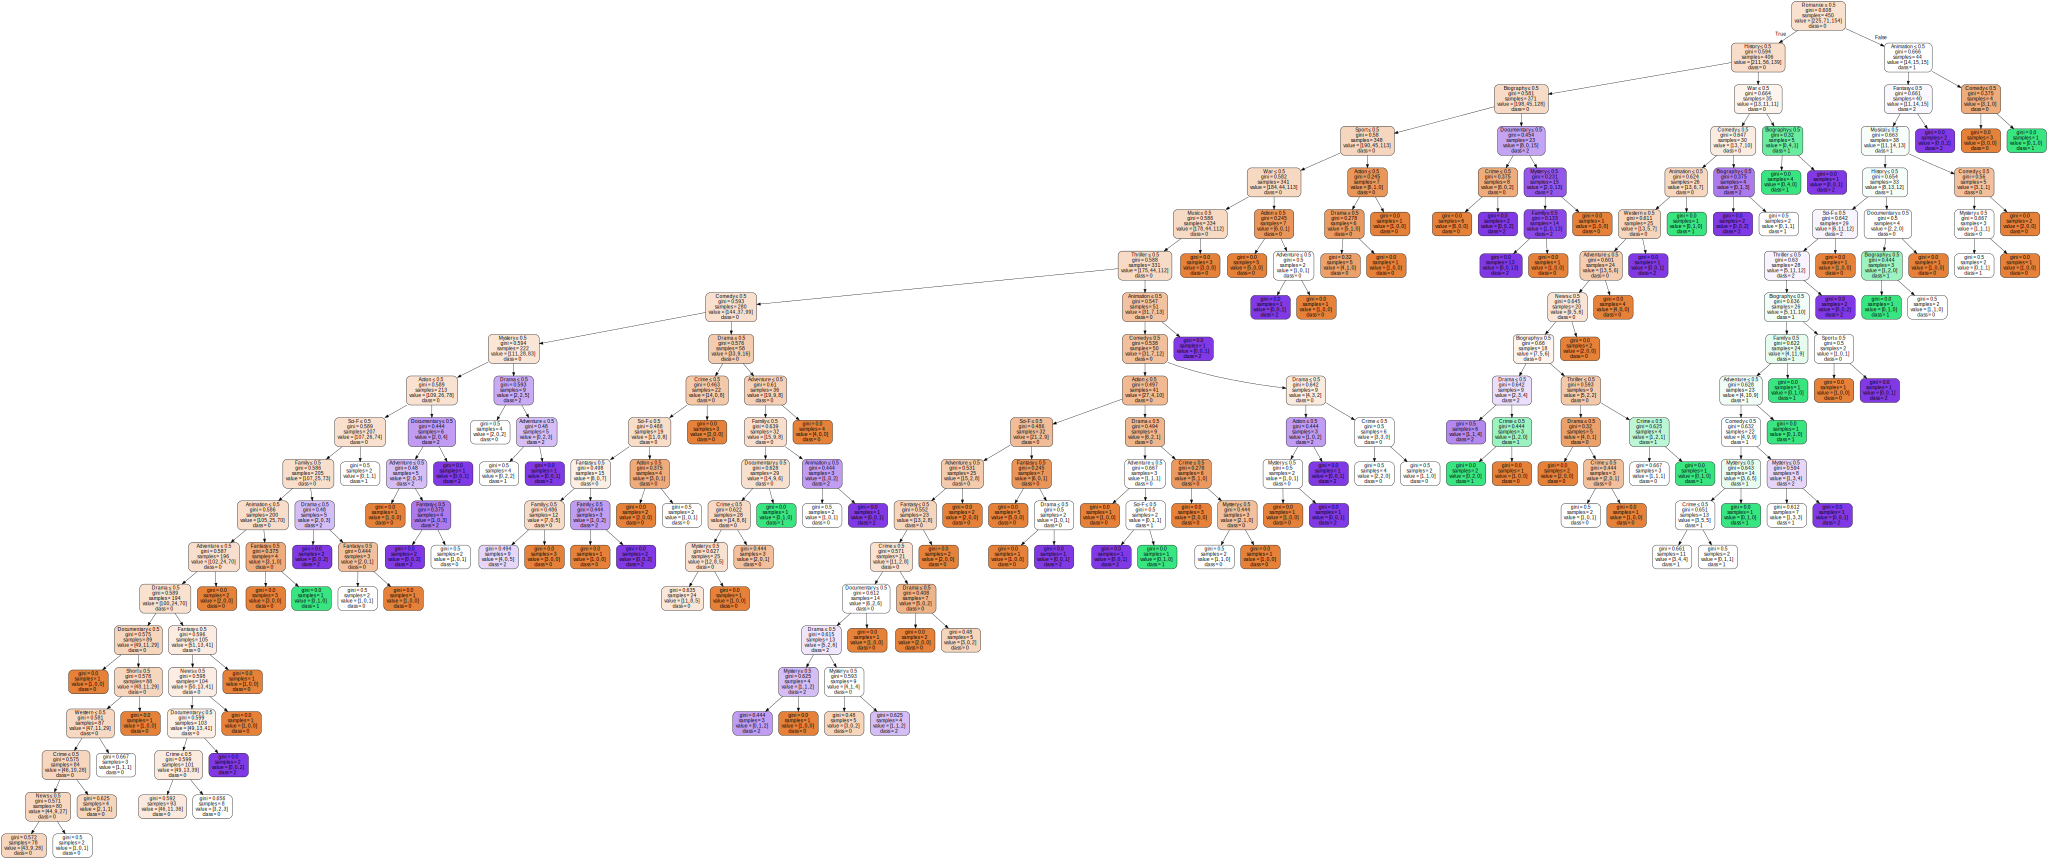

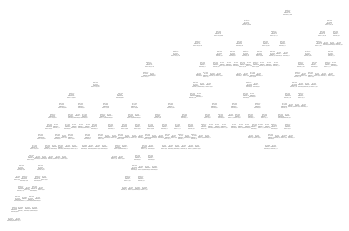

In [4]:
#첫번째로 전문가평점과 영화 장르를 대상으로 클러스팅함.
pca = PCA(n_components=1) # 영화 장르를 1개로 압축시킴
fit = pca.fit(Genre_arr) 
# 클러스터링해서 예측값을 알아냄
X_reduced = pca.fit_transform(Genre_arr) 
X1 =  pd.DataFrame(X_reduced,columns=['X1'])
X2 =  pd.DataFrame(movie['Score'])
feature = pd.concat([X1,X2],axis=1)
model = KMeans(n_clusters=3)
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

r = pd.concat([feature, predict], axis=1)
# 클러스터링 결과를 시각화해서 확인해보기
#각각 genre값 스코어값 대입
centers = pd.DataFrame(model.cluster_centers_,columns=['X1', 'Score'])
center_x = centers['X1']
center_y = centers['Score']

# 클러스터링 결과를 시각화
plt.scatter(r['X1'],r['Score'], c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='g')
plt.savefig('Score_Genre_Clust.png')
plt.show()
# 어떤 클러스팅이 적합한지 알아보기 위해 elbow curve 그래프로 알아보는 모습
n_clusters = range(1,10)
Kmeans = [KMeans(n_clusters = i) for i in n_clusters]

scroe = [Kmeans[i].fit(feature).inertia_ for i in range(len(Kmeans))]

plt.plot(n_clusters,scroe)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

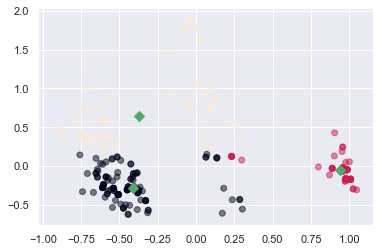

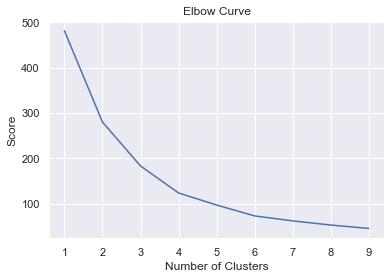

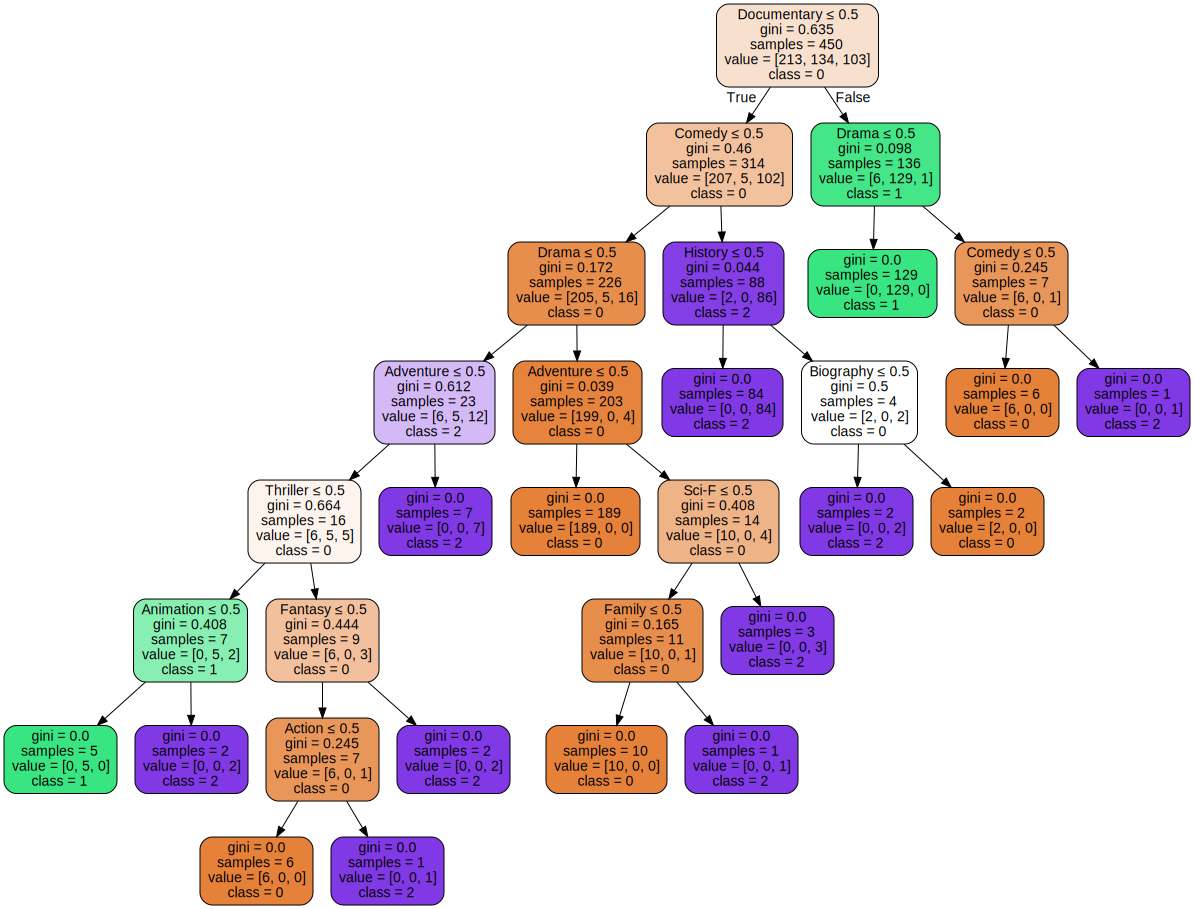

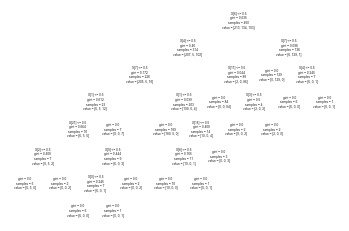

In [18]:
#두번째로 영화 장르를 대상으로 클러스팅함.
pca = PCA(n_components=2) #몇개로 압축시킬건지
fit = pca.fit(Genre_arr)
X_reduced = pca.fit_transform(Genre_arr) #줄인다!
# 클러스터링해서 예측값을 알아냄 
feature = pd.DataFrame(X_reduced,columns=['X1', 'X2'])
model = KMeans(n_clusters=3)
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']
predict
r = pd.concat([feature, predict], axis=1)
#### 클러스터링 결과를 시각화해서 확인해보기
#장르 데이터들을 2개로 압축한 것을 대입
centers = pd.DataFrame(model.cluster_centers_,columns=['X1', 'X2'])
center_x = centers['X1']
center_y = centers['X2']

# 클러스터링 결과를 시각화
plt.scatter(r['X1'],r['X2'], c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='g')
plt.savefig('Genre_Clust.png')
plt.show()

plt.plot(n_clusters,scroe)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#클러스팅 결과가 육안으로 좋기 나왔기 때문에 Descion Tree를 활용하여 각 특징별로 어떤 결과가 나오는지 시각화함
df = pd.DataFrame(Genre_arr, columns = Genre_name)
label = pd.DataFrame(data = predict , columns = ['predict'])
#train값과 test값을 0.8로나눔
X_train, X_test, Y_train, Y_test = train_test_split(df,label,train_size = 0.8)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

tree.plot_tree(clf.fit(Genre_arr, predict))
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = Genre_name,
                                class_names = ['0','1','2'],
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph.render(filename='Score_Genre_tree.png') # png로 저장
graph

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


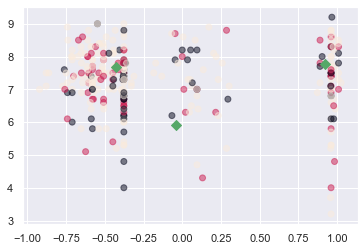

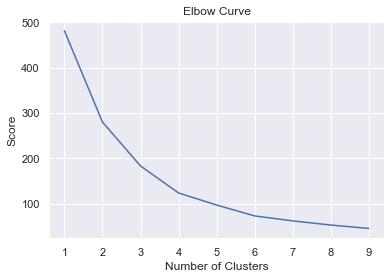

In [15]:
#세번째로 유저평점과 영화 장르를 대상으로 클러스팅함.
#유저 평점이 제공되지 않는 영화가 있어 미리 삭제하는 모습
temp_movie = pd.read_csv("Movie.csv", names = None)
pca = PCA(n_components=1) #몇개로 압축시킬건지
fit = pca.fit(Genre_arr)
X_reduced = pca.fit_transform(Genre_arr) #줄인다!
X1 =  pd.DataFrame(X_reduced,columns=['X1'])

for i in range (0, len(movie)):
  if (temp_movie['USER_SCORE'][i] == 'tbd'):
    temp_movie = temp_movie.drop(i).copy()
    X1 = X1.drop(i).copy()
  else:
    temp_movie['USER_SCORE'][i] = float(movie['USER_SCORE'][i])
X2 =  pd.DataFrame(temp_movie['USER_SCORE'])

# 클러스팅
feature = pd.concat([X1,X2],axis=1)
model = KMeans(n_clusters=3)
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']
r = pd.concat([feature, predict], axis=1)
#### 클러스터링 결과를 시각화해서 확인해보기

centers = pd.DataFrame(model.cluster_centers_,columns=['X1', 'USER_SCORE'])
center_x = centers['X1']
center_y = centers['USER_SCORE']

# 그려낸 그래프를 시각화
plt.scatter(r['X1'],r['USER_SCORE'], c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='g')
plt.savefig('USER_Score_Genre_Clust.png')
plt.show()
# 어떤 클러스팅이 적합한지 알아보기 위해 elbow curve 그래프로 알아보는 모습
n_clusters = range(1,10)
Kmeans = [KMeans(n_clusters = i) for i in n_clusters]
scroe = [Kmeans[i].fit(feature).inertia_ for i in range(len(Kmeans))]

plt.plot(n_clusters,scroe)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()